# Using Euler's method

Partial differential equation

\begin{align}
        {a_2I} + {a_4I^3} - {b_2} \frac{\partial ^2 I}{\partial s^2} =  \lambda \dfrac{\partial I}{\partial t}
    \end{align}

hyperbolic

We'll assume that ∂I/∂t = 0, which means we're looking for the spatial distribution evolution
over time.

**Discretization**

1. Discretize the spatial domain $\ {(s)}$ into discrete points $\
{s_i}$ where $\ i = 0,1,2,3,...,N$. with a step size $\Delta S$

2. Discretize the temporal domain $\ {(t)}$ into discrete time steps $\ {t_n}$ where $\ n = 0,1,2,3,...,N$ with a step size $\Delta T$



3. Define $\ {I_n^i}$ as the value of  $\ I$ at spatial point $\ {s_i}$ and time $\ {t_n}$



**Finite Difference Approximation:**

1. Approximate the second spatial derivative using finite differences:

\begin{align}
        \frac{\partial ^2 I}{\partial s^2} \approx \ \frac{I_n^{i-1}-2I_n^{i}+I_n^{i+1}}{ \Delta s^2}
    \end{align}

**Update Equation:**

1. Use the discretized equation to update $\ I_i^{n-1}$ at each time step:

\begin{align}
        {a_2I_i^n} + {a_4I_i^n} - {b_2} \frac{I_n^{i-1}-2I_n^{i}+I_n^{i+1}}{ \Delta s^2} =  0
    \end{align}

2. Rearrange it to solve for $\ I_i^{n+1}$



\begin{align}
        \ I_i^{n+1} = \frac{{b_2}\Delta s^2}{a_2+a_4}(\ I_n^{i-1}-2I_n^{i}+I_n^{i+1})
    \end{align}

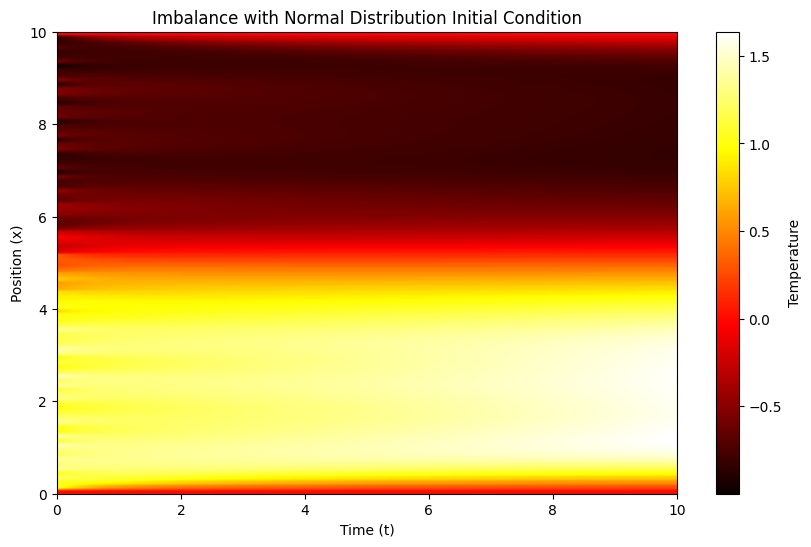

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 10.0  # Length of the domain
N = 100  # Number of spatial points
alpha = 0.01  # Thermal diffusivity
T = 10.0  # Total simulation time
num_steps = 1000  # Number of time steps
dx = L / N
dt = T / num_steps
a2 = 0.01 #changes across the coordinates values, how the model behaves
a4 = 0.01

# Initialize the temperature field with a normal distribution at t=0
x = np.linspace(0, L, N)
u = np.zeros((N, num_steps))

# Set the initial condition (normal distribution)
mu = 5.0
sigma = 1.0
#u[:, 0] = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))
u[:, 0] = np.tanh((x-mu)/sigma) + 0.5*np.random.rand(N)

# Time-stepping loop
for t in range(0, num_steps - 1):
    for i in range(1, N - 1):
        #u[i, t + 1] = u[i, t] + alpha * dt / dx**2 * (u[i+1, t] - 2*u[i, t] + u[i-1, t])
        u[i, t + 1] = u[i, t] + alpha * dt / dx**2 * (u[i+1, t] - 2*u[i, t] + u[i-1, t]) + (a2*u[i, t] + a4*(u[i, t])**3)*dt

# Plot the imbalance field over time
plt.figure(figsize=(10, 6))
plt.imshow(u, cmap='hot', extent=[0, T, 0, L], aspect='auto')
plt.colorbar(label='Temperature')
plt.xlabel('Time (t)')
plt.ylabel('Position (x)')
plt.title('Imbalance with Normal Distribution Initial Condition')
plt.show()

Change coefficient parameters, see what it affects and all that stuff, get a2 changed accross t(profile in the paper, rectangular profile.)
tanh, and see how it evolves.
Numeric solution against analytic in the paper.
Add or few pages

How changes